# Ivan's E-Commerce Exploratory NoteBook

#####
Data Importing and Pre-processing
- Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
- Clean, wrangle, and handle missing data
- Transform data appropriately using techniques such as aggregation, normalization, and feature construction
- Reduce redundant data and perform need based discretization

Data Analysis and Visualization
- Identify categorical, ordinal, and numerical variables within data
- Provide measures of centrality and distribution with visualizations
- Diagnose for correlations between variables and determine independent and dependent variables
- Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

Data Analytics
- Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
- Train, test, and provide accuracy and evaluation metrics for model results

Presentation
- In a 5 to 10 minutes video, briefly explain the project workflow from the code and results in your markdown notebook
State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

#### Importing libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics

#### Importing CSV Dataset from E-Commerce

In [101]:
#Set File Path & import csv
datasetFP = '../data/Dataset 3 (Online Shoppers Intention)/online_shoppers_intention.csv'
eCommerceDF = pd.read_csv(datasetFP) 

In [102]:
eCommerceDF.shape

(12330, 18)

##### 12330 Rows and 18 columns in the data set

### Removing duplicates from the data

In [103]:
eCommerceDF = eCommerceDF.drop_duplicates()

In [104]:
eCommerceDF.shape

(12209, 18)

##### Removed 121 duplicate values

### Displaying total missing value count per column

In [105]:
eCommerceDF.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

### Filling Page Values based on Revenue --> Saw if Revenue is False Page Values had a value of 0

In [106]:
eCommerceDF.loc[eCommerceDF['PageValues'].isnull()&eCommerceDF['Revenue'].notnull()&eCommerceDF['Revenue'].eq(False),'PageValues'] = 0

### Filling incorrect Revenue values based on inversed previous logic --> If PageValues != 0 then Revenue = True

In [107]:
eCommerceDF.loc[eCommerceDF['PageValues']!=0&eCommerceDF['Revenue'].eq(False),'Revenue'] = True

In [108]:
eCommerceDF.corr()['OperatingSystems']

Administrative            -0.005337
Administrative_Duration   -0.006583
Informational             -0.008812
Informational_Duration    -0.010230
ProductRelated             0.004743
ProductRelated_Duration    0.003867
BounceRates                0.025934
ExitRates                  0.015798
PageValues                 0.019594
SpecialDay                 0.013518
OperatingSystems           1.000000
Browser                    0.215002
Region                     0.072517
TrafficType                0.183672
Weekend                    0.001013
Revenue                   -0.013535
Name: OperatingSystems, dtype: float64

### Dropping Operating System Column not a good predictor variable for Revenue

In [109]:
eCommerceDF = eCommerceDF.drop('OperatingSystems',1)

In [110]:
eCommerceDF.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                  21
SpecialDay                   0
Month                        0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

### Filling Information with logic --> If user duration on an Informational Page is 0 then Informational_Duration has to be equal to 0 

In [111]:
eCommerceDF.loc[eCommerceDF['Informational'].isnull()&eCommerceDF['Informational_Duration'].notnull()&eCommerceDF['Informational_Duration'].eq(0),'Informational'] = 0

In [112]:
eCommerceDF.isnull().sum()

Administrative              0
Administrative_Duration     0
Informational              24
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates                 0
ExitRates                   0
PageValues                 21
SpecialDay                  0
Month                       0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [113]:
eCommerceDF.shape[0]

12209

### Dropped remaining 45 null values

In [114]:
eCommerceDF = eCommerceDF.dropna()

In [115]:
eCommerceDF.shape[0] 

12164

### Inspecting data type for each column

In [116]:
eCommerceDF.dtypes

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### Updating data type for Informational to int to align with Admin and Product Related

In [117]:
eCommerceDF['Informational'] = eCommerceDF['Informational'].astype('int64')

### Dropping following columns due to low correlation to Revenue

In [118]:
eCommerceDF[['Browser','Region','TrafficType', 'Revenue']].corr()

,Browser,Region,TrafficType,Revenue
Browser,1.000000,0.091677,0.103203,0.012111
Region,0.091677,1.000000,0.043468,-0.013214
TrafficType,0.103203,0.043468,1.000000,-0.024429
Revenue,0.012111,-0.013214,-0.024429,1.000000


In [119]:
eCommerceDF = eCommerceDF.drop(columns=['Browser','Region','TrafficType'])

### Exploring relationships for the following columns after inital preprocessing

In [120]:
eCommerceDF.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

#### Other and New_Vistors have a low count compared to Returning_Visitor

In [121]:
eCommerceDF.groupby(by="VisitorType").count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,Revenue
VisitorType,,,,,,,,,,,,,
New_Visitor,1690,1690,1690,1690,1690,1690,1690,1690,1690,1690,1690,1690,1690
Other,81,81,81,81,81,81,81,81,81,81,81,81,81
Returning_Visitor,10393,10393,10393,10393,10393,10393,10393,10393,10393,10393,10393,10393,10393


### Noticed on average if a purchase is made a greater amount of Product Related and Informational Pages are visited

In [122]:
eCommerceDF.groupby(by = "Revenue").mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend
Revenue,,,,,,,,,,,
False,1.674278,59.279889,0.342079,21.808975,24.075530,890.945726,0.025313,0.048604,0.000000,0.071753,0.228126
True,4.273650,147.106622,0.979705,72.139553,55.276268,2125.572116,0.006094,0.020691,23.544304,0.032209,0.251718


### Month is a good predictor for Revenue -->  November yields a higher chance of a purchase

Text(0, 0.5, 'Frequency of Purchase')

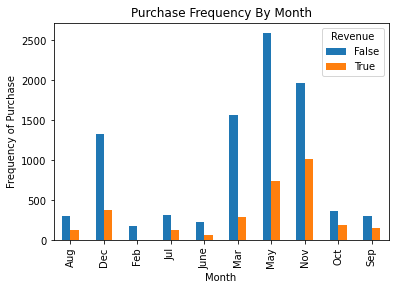

In [123]:
pd.crosstab(eCommerceDF.Month,eCommerceDF.Revenue).plot(kind='bar')
plt.title('Purchase Frequency By Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

### Special Day does not appear to be a good indicator based off the graph

Text(0, 0.5, 'Frequency of Purchase')

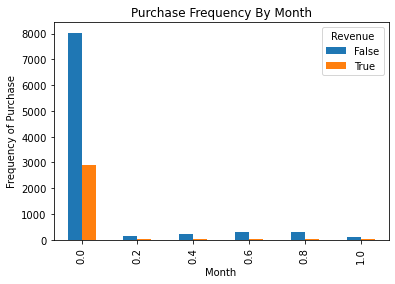

In [124]:
%matplotlib inline
pd.crosstab(eCommerceDF.SpecialDay,eCommerceDF.Revenue).plot(kind='bar')
plt.title('Purchase Frequency By Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

### Vistor Type May Not be a good predictor --> Seems like there is an equal ratio between New and Returning

Text(0, 0.5, 'Frequency of Purchase')

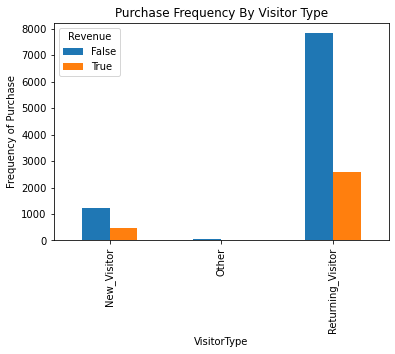

In [125]:
%matplotlib inline
pd.crosstab(eCommerceDF.VisitorType,eCommerceDF.Revenue).plot(kind='bar')
plt.title('Purchase Frequency By Visitor Type')
plt.xlabel('VisitorType')
plt.ylabel('Frequency of Purchase')

### Weekend may not be a good predictor --> Equal ratio based off a purchase being made on weekend or weekday

Text(0, 0.5, 'Frequency of Purchase')

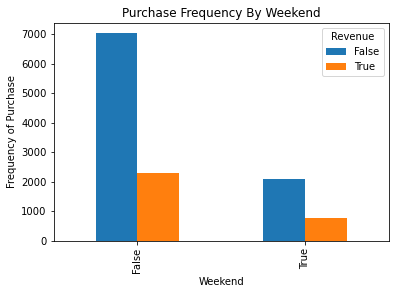

In [126]:
%matplotlib inline
pd.crosstab(eCommerceDF.Weekend,eCommerceDF.Revenue).plot(kind='bar')
plt.title('Purchase Frequency By Weekend')
plt.xlabel('Weekend')
plt.ylabel('Frequency of Purchase')

### I will be dropping vistor type, weekend, bounce rates, exit rates, page values as a result of the team findings 

In [127]:
eCommerceDF = eCommerceDF.drop(columns=['Weekend','VisitorType','BounceRates','PageValues','SpecialDay'])

In [128]:
eCommerceDF.corr()['Revenue']

Administrative             0.339887
Administrative_Duration    0.214997
Informational              0.218070
Informational_Duration     0.154887
ProductRelated             0.304676
ProductRelated_Duration    0.280170
ExitRates                 -0.261418
Revenue                    1.000000
Name: Revenue, dtype: float64

### Check data for variance and normalizing if necessary

<function matplotlib.pyplot.show(close=None, block=None)>

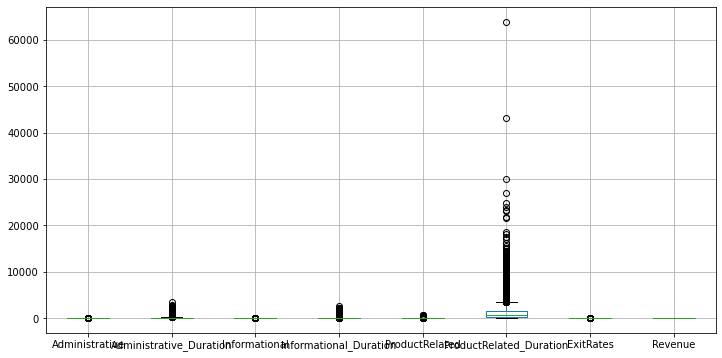

In [129]:
plt.figure(figsize=(12,6))
eCommerceDF.boxplot()
plt.show

### Transform columns using log to normalize extreme outliers

##### Following function will check each column and verify if it is an int64 or float64 then log normalize the data in that column

In [130]:
eCommerceDF_log = eCommerceDF

numerics = ['float64','int64']
for c in [c for c in eCommerceDF_log.columns if eCommerceDF_log[c].dtype in numerics]:
    eCommerceDF_log[c] = np.log(eCommerceDF_log[c]+1)

### Log normalization reduced the extereme outliers

<function matplotlib.pyplot.show(close=None, block=None)>

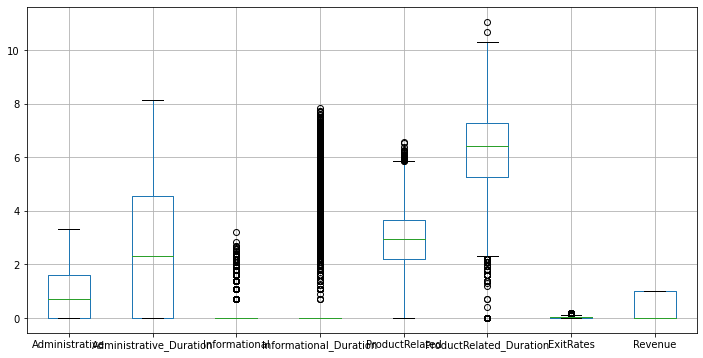

In [131]:
plt.figure(figsize=(12,6))
eCommerceDF_log.boxplot()
plt.show

### Columns and correlations to keep for log regression model

In [132]:
eCommerceDF.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'ExitRates', 'Month', 'Revenue'],
      dtype='object')

In [133]:
eCommerceDF.corr()['Revenue']

Administrative             0.349338
Administrative_Duration    0.326470
Informational              0.241452
Informational_Duration     0.243927
ProductRelated             0.363558
ProductRelated_Duration    0.327384
ExitRates                 -0.265289
Revenue                    1.000000
Name: Revenue, dtype: float64

### Log Regression Set Up

##### Notice there is an imbalance between False and True Values as first seen in the preprocessing steps

Text(0, 0.5, 'Count In DataFrame')

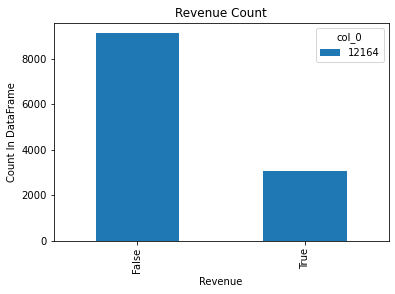

In [134]:
pd.crosstab(eCommerceDF_log.Revenue,eCommerceDF_log.Revenue.count()).plot(kind='bar')
plt.title('Revenue Count')
plt.xlabel('Revenue')
plt.ylabel('Count In DataFrame')

### Encoding Months for preprocessing via panda dummy variables

In [135]:
eCommerceDF_log = pd.get_dummies(eCommerceDF_log, columns=["Month"])

### Seperating data into a training and test set

In [136]:
X = eCommerceDF_log.loc[:, eCommerceDF_log.columns != 'Revenue']
y = eCommerceDF_log.loc[:, eCommerceDF_log.columns == 'Revenue']

##### Using Imbalance Learn library SMOTE to oversample and 

In [137]:
os = SMOTE(random_state=0)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
columns = X_train.columns

##### Oversampled only on training data SMOTE will not create duplicates but create a similar, randomly tweaked observation

In [139]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Revenue'])
print("length of oversampled data is ",len(os_data_X))
print("Number of purchases in oversampled data",len(os_data_y[os_data_y['Revenue']==True]))
print("Number of no purchases",len(os_data_y[os_data_y['Revenue']==False]))
print("Proportion of no purchases data in oversampled data is ",len(os_data_y[os_data_y['Revenue']==False])/len(os_data_X))
print("Proportion of purchases data in oversampled data is ",len(os_data_y[os_data_y['Revenue']==True])/len(os_data_X))

length of oversampled data is  14502
Number of purchases in oversampled data 7251
Number of no purchases 7251
Proportion of no purchases data in oversampled data is  0.5
Proportion of purchases data in oversampled data is  0.5


#### Now the training data is balanced and ready to fit into the Log Regression Model

Text(0, 0.5, 'Count In DataFrame')

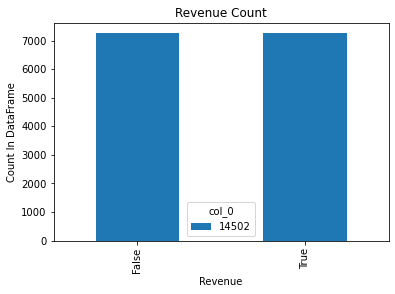

In [140]:
pd.crosstab(os_data_y.Revenue,os_data_y.Revenue.count()).plot(kind='bar')
plt.title('Revenue Count')
plt.xlabel('Revenue')
plt.ylabel('Count In DataFrame')

In [141]:
logReg = LogisticRegression(max_iter=10000)

#### Fitting the training data created via SMOTE

In [142]:
logReg.fit(os_data_X,os_data_y.values.ravel())

LogisticRegression(max_iter=10000)

##### Using the non oversampled test data to test the Log Regression prediction

In [143]:
y_pred = logReg.predict(X_test)

#### Visualizing the Confusion Matrix which shows 1345 + 428 correctly predicted values and 513 + 147 incorrect predicted values

Text(0.5, 257.44, 'Predicted label')

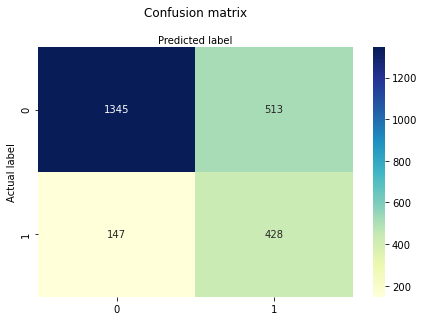

In [145]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [146]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7287299630086314
Precision: 0.45483528161530284
Recall: 0.7443478260869565


#### Plotting the ROC Curve, Log Model produced a viable result above the 0.5 random mark

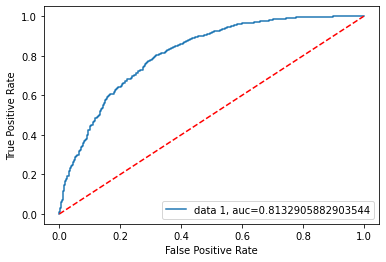

In [147]:
y_pred_proba = logReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()